In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\Users\penfr\OneDrive\Desktop\Intellipaat_Python\random_forest_assignment\census-income.csv")

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.shape

(32561, 15)

In [11]:
for col in df.columns:
    print(col,":",df[col].unique())

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : [ 77516  83311 215646 ...  34066  84661 257302]
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'

In [8]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
df["Type 2"]

0      Poison
1      Poison
2      Poison
3      Poison
4         NaN
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

In [12]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [13]:
print("Object type columns:")
for col in df.columns:
    if df[col].dtype=='object':
        print(col)

Object type columns:
Name
Type 1
Type 2


In [14]:
df.duplicated().sum()

0

# Questions

In [17]:
corr_res=df.corrwith(df["Generation"],numeric_only=True)
corr_res

#             0.982516
Total         0.048384
HP            0.058683
Attack        0.051451
Defense       0.042419
Sp. Atk       0.036437
Sp. Def       0.028486
Speed        -0.023121
Generation    1.000000
Legendary     0.079794
dtype: float64

C:\Users\penfr\AppData\Local\Temp\ipykernel_20424\3284102836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot:>

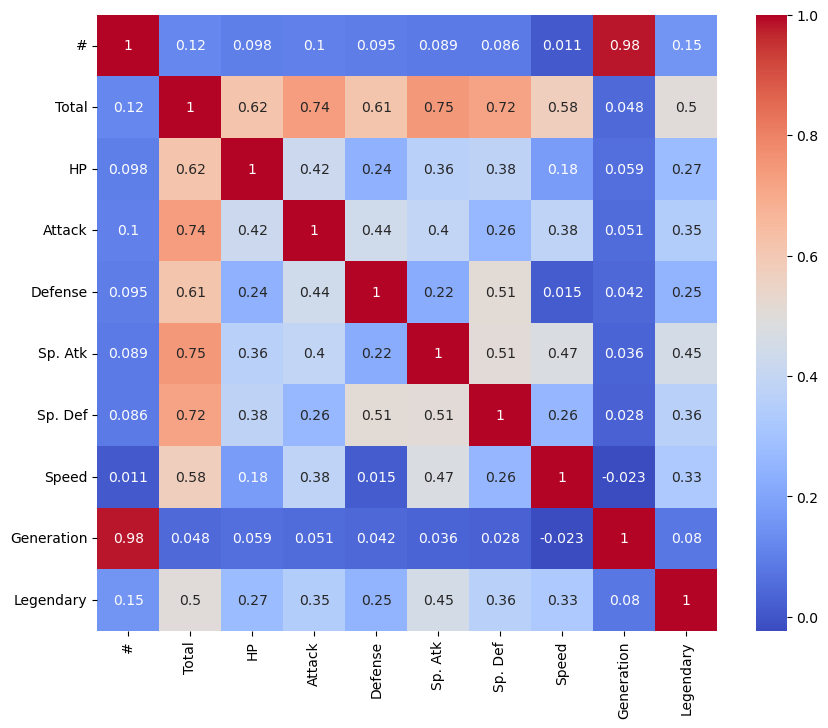

In [18]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)

# Visualisations

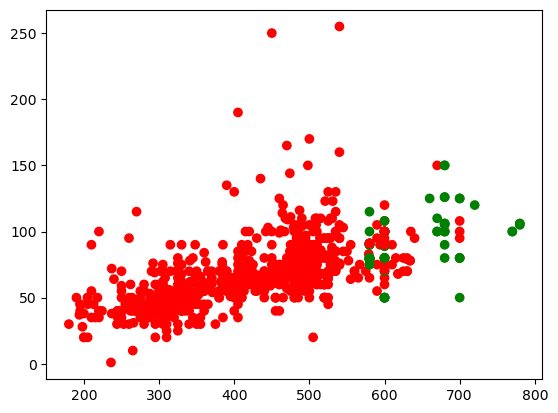

In [19]:
plt.scatter(df["Total"],df["HP"],c=df['Legendary'].map({False:'red',True:'green'}),label=df['Legendary'])    
      

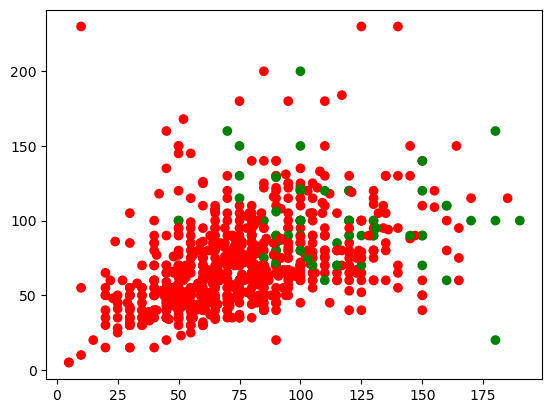

In [20]:

plt.scatter(df["Attack"],df["Defense"],c=df['Legendary'].map({False:'red',True:'green'}),label=df['Legendary'])

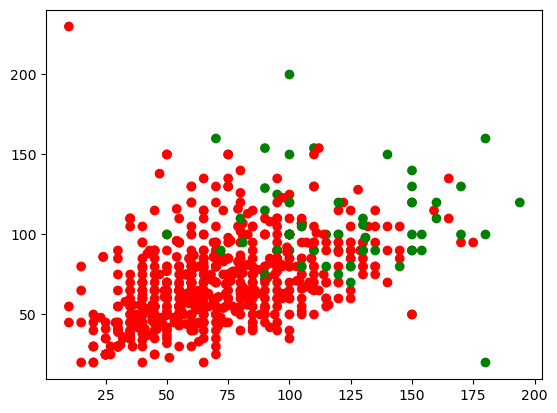

In [21]:
plt.scatter(df["Sp. Atk"],df["Sp. Def"],c=df['Legendary'].map({False:'red',True:'green'}),label=df['Legendary'])


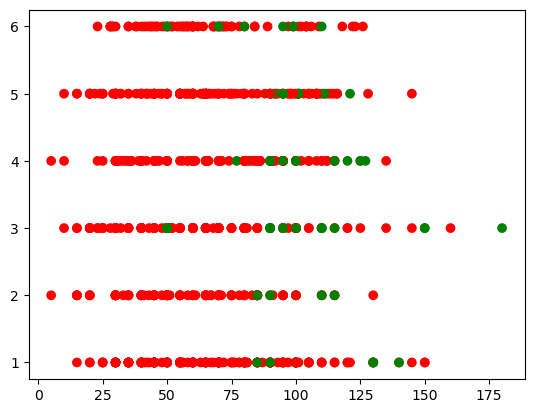

In [22]:
plt.scatter(df["Speed"],df["Generation"],c=df['Legendary'].map({False:'red',True:'green'}),label=df['Legendary'])


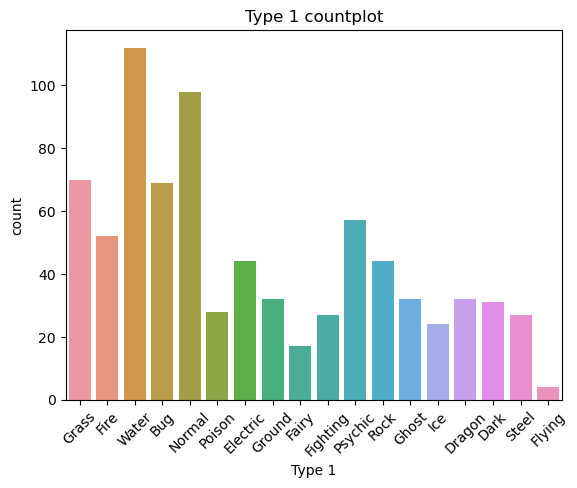

In [23]:
sns.countplot(x="Type 1",data=df)
plt.xticks(rotation=45)
plt.title("Type 1 countplot")
plt.show()

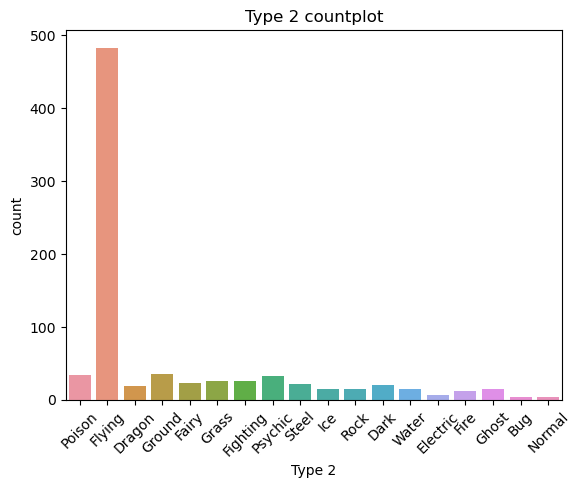

In [24]:
sns.countplot(x="Type 2",data=df)
plt.xticks(rotation=45)
plt.title("Type 2 countplot")
plt.show()

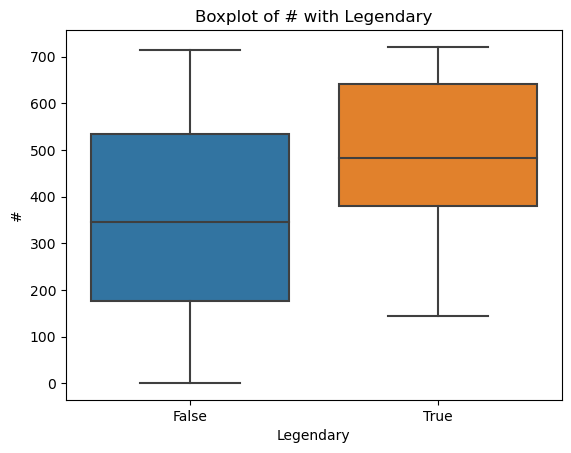

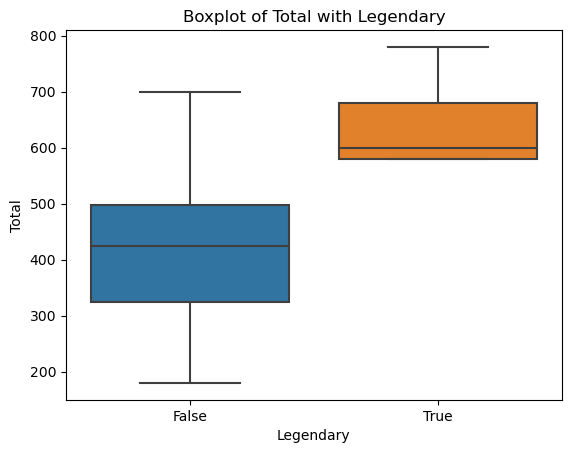

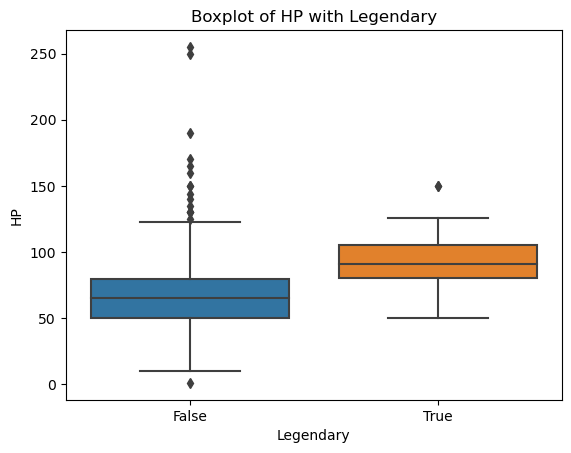

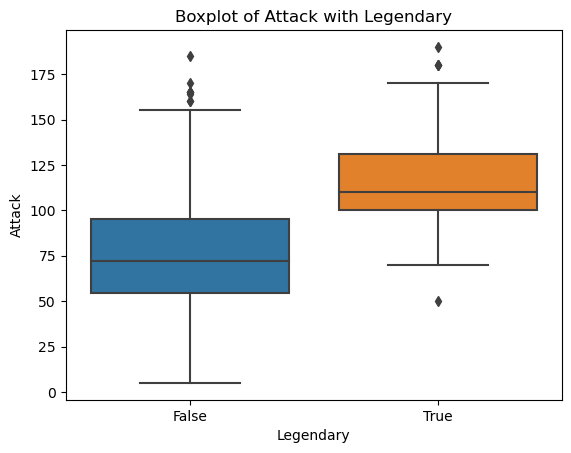

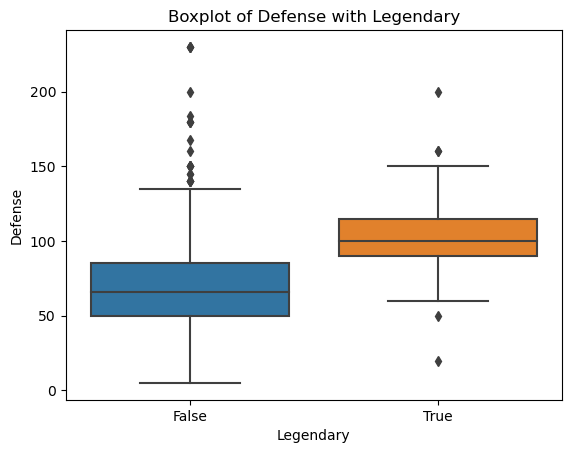

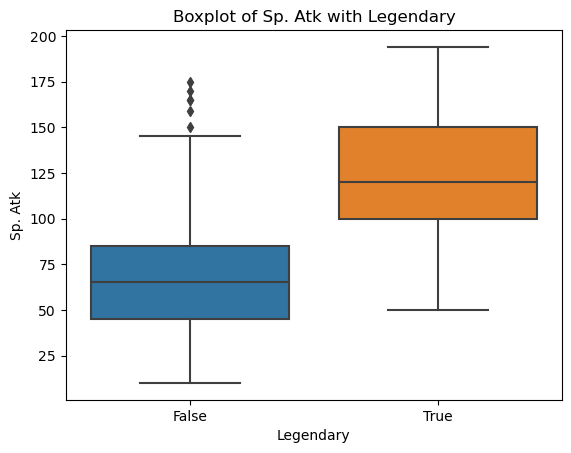

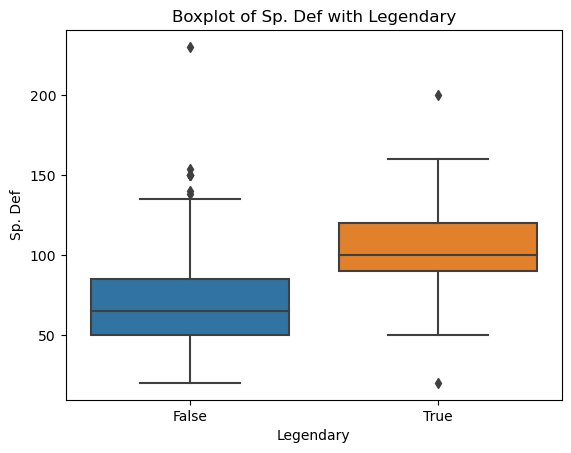

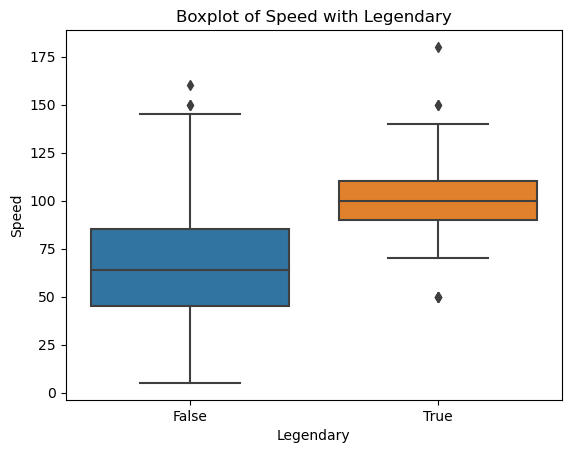

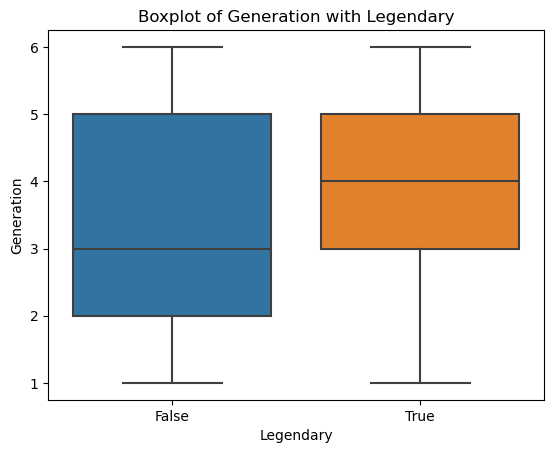

In [25]:
for col in df.columns:
    if col != "Legendary" and df[col].dtype in ['int64', 'float64']:
        sns.boxplot(x='Legendary', y=col, data=df)
        plt.title(f'Boxplot of {col} with Legendary')
        plt.xlabel('Legendary')
        plt.ylabel(col)
        plt.show()

In [26]:
from sklearn.preprocessing import OneHotEncoder
# Assuming df is your DataFrame
encoder = OneHotEncoder(drop='first', sparse=True)
df_ed_sparse = encoder.fit_transform(df)

# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(df.columns)

# Convert sparse matrix to DataFrame
df_ed = pd.DataFrame.sparse.from_spmatrix(df_ed_sparse, columns=feature_names)

# Now df_ed should have the one-hot encoded columns with appropriate names
print(df_ed.columns)

Index(['#_2', '#_3', '#_4', '#_5', '#_6', '#_7', '#_8', '#_9', '#_10', '#_11',
       ...
       'Speed_145', 'Speed_150', 'Speed_160', 'Speed_180', 'Generation_2',
       'Generation_3', 'Generation_4', 'Generation_5', 'Generation_6',
       'Legendary_True'],
      dtype='object', length=2365)


C:\Users\penfr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
X=df_ed.drop("Legendary_True",axis=1)
y=df_ed["Legendary_True"]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
from sklearn.preprocessing import LabelEncoder

cate_cols=df_ed.select_dtypes(include='object').columns
label_encoder = LabelEncoder()

for col in cate_cols:
    if col in data.columns:# Checking if the column exists in the DataFrame
        df_edit[col + '_encoded'] = label_encoder.fit_transform(df_edit[col])
        df_edit.drop(col,axis=1,inplace=True)


In [30]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [31]:
y_pred=model.predict(X_test)

In [32]:
from sklearn.metrics import *
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.4f}")

Accuracy:0.9042


In [33]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and fit the Decision Tree model
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)

# Predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9458333333333333
Confusion Matrix:
[[212   7]
 [  6  15]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       219
         1.0       0.68      0.71      0.70        21

    accuracy                           0.95       240
   macro avg       0.83      0.84      0.83       240
weighted avg       0.95      0.95      0.95       240



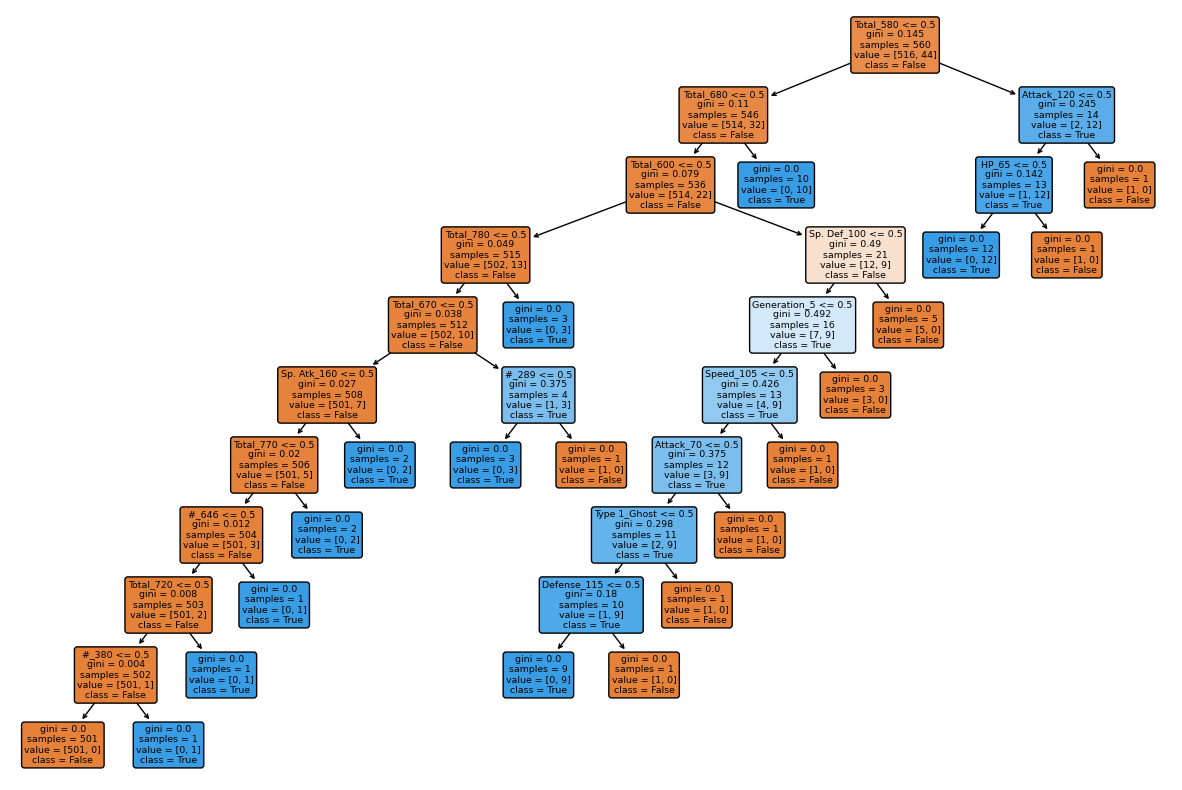

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizing the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model2, feature_names=X.columns, class_names=["False", "True"], filled=True, rounded=True)
plt.show()



In [36]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.95625
Confusion Matrix:
[[150   0]
 [  7   3]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       150
         1.0       1.00      0.30      0.46        10

    accuracy                           0.96       160
   macro avg       0.98      0.65      0.72       160
weighted avg       0.96      0.96      0.94       160

